<font color="#FF5733">


**Version finale du code 1D**


</font>

In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
import copy
from ctwr_model import *
from setup_plot import *

# Load experimental data
with open('mistral_exp_3p5.json', 'r') as f:
    donnees_json = json.load(f)

Pour calculer le débit d'eau liquide perdu sous forme de gouttelettes dans le nuage :
$x^{H}-x_{sat}(T_{h}(H)) = \frac{\dot{m_{gout}}}{\dot{m_{d}}}$


<font color="#FF5733">


**-------------------------------------------PARTIE PROPRE AVEC LES FIGURES FINALES---------------------------------------**



</font>

<font color="#FF5733">

**-----------Code propre cas du test bench**


</font>

In [6]:
dico_glob = copy.deepcopy(donnees_json)
mod_res = {}
N2 = 3000

h_pack = 1.75
h_cold = 10
h_hot = 0.950
S_pack = 49

n_cases = 55
for i in range(1,n_cases + 1):
    print(i)
    P_0 = dico_glob[str(i)]['Patm_Pa']
    mpt_d_i = dico_glob[str(i)]['Qa_kg/s']
    mpt_w_i = dico_glob[str(i)]['Qw_kg/s']
    T_h_i = dico_glob[str(i)]['Ta_est_degC'] + 273.15
    T_w_i = dico_glob[str(i)]['Tin_w_degC'] + 273.15
    x_rel_i = dico_glob[str(i)]['Hr_est_%']*1e-2
    resu_final = solve_ctwr(h_cold, h_pack, h_hot, S_pack, P_0,T_h_i,T_w_i,mpt_d_i,mpt_w_i,x_rel_i, lamb_evap=0.75, n_evap=0.6016)
    dico_glob[str(i)]['Tout_w_degC'] = resu_final[0][0]
    dico_glob[str(i)]['Ta_tuy_degC'] = resu_final[1][N2-1]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


<font color="#FF5733">

**-----------Partie des Plots des erreurs cas du Test Bench**


</font>

0.062400100028617074 0.038141400446836345


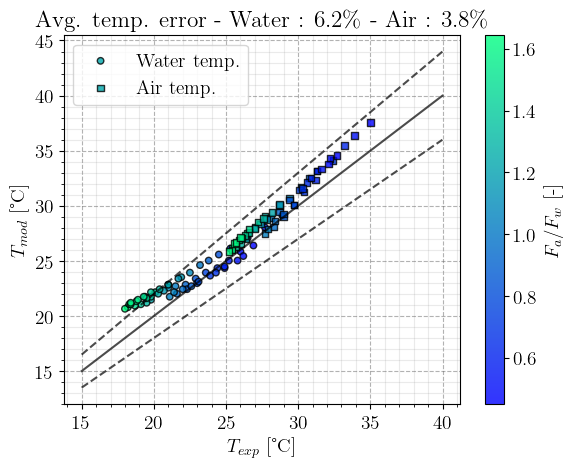

In [25]:
###################### PLOT DE LA FIGURE 6 GAUCHE du papier 

# Water temperatures
L1_w = np.array([dico_glob[str(i)]['Tout_w_degC']-273.15 for i in range(1,n_cases+1)])
L2_w = np.array([donnees_json[str(i)]['Tout_w_degC'] for i in range(1,n_cases+1)])
err_w = np.average([abs(L2_w[i]-L1_w[i])/L2_w[i] for i in range(len(L2_w))])

# Air temperatures
L1_h = np.array([dico_glob[str(i)]['Ta_tuy_degC'] - 273.15 for i in range(1, n_cases+1)])
L2_h = np.array([donnees_json[str(i)]['Ta_tuy_degC'] for i in range(1, n_cases+1)])
err_h = np.average([abs(L2_h[i]-L1_h[i])/L2_h[i] for i in range(len(L2_h))])

print(err_w, err_h)
Fa_s_Fe = np.array([donnees_json[str(i)]['Fa/Fe'] for i in range(1, n_cases+1)])

X = np.arange(15, 40, 0.01)
errp = [1.1*x for x in X]
errm = [0.9*x for x in X]

fig, ax = plt.subplots()
setup_ax(ax, xlabel=r'$T_{exp}$ [°C]', ylabel=r'$T_{mod}$ [°C]')
ax.plot(X, X, '-', c='k', alpha=0.7)
ax.plot(X, errp, '--', c='k', alpha=0.7)
ax.plot(X, errm, '--', c='k', alpha=0.7)

# Water plot
sc = ax.scatter(L2_w, L1_w, marker='o', c=Fa_s_Fe, edgecolor='black', label='Water temp.', cmap='winter', s=22, alpha=0.8)
plt.colorbar(sc, label=r'$F_{a}/F_{w}$ [-]')

# Air plot
ax.scatter(L2_h, L1_h, marker='s', c=Fa_s_Fe, edgecolor='black', label='Air temp.', cmap='winter', s=22, alpha=0.8)

ax.set_title(f'Avg. temp. error - Water : {round(err_w*100,1)}\% - Air : {round(err_h*100,1)}\%')
# Légende et labels
ax.legend(loc='best')
plt.savefig('temp.pdf', format='pdf')
plt.show()

<font color="#FF5733">

**-----------Code propre et plots cas de DAMPIERRE**


</font>

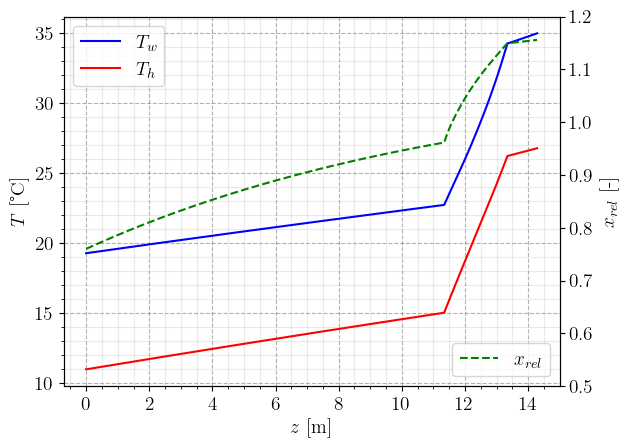

In [30]:
### Parametres geometriques

h_pack = 2
h_hot = 950e-3                                                 
h_cold = 11.34     
S_pack = 11565                                          

P_0 = 1e5
mpt_w_i = 34538
mpt_d_i = 1.229*mpt_w_i
T_h_i = 11 + 273.15
T_w_i = 34.7 + 273.15
x_rel_i = 0.76
result_f = solve_ctwr(h_cold, h_pack, h_hot, S_pack, P_0,T_h_i,T_w_i,mpt_d_i,mpt_w_i,x_rel_i, lamb_evap=0.872, n_evap=0.6)


###################### PLOT DE LA FIGURE 8 GAUCHE du papier

fig, ax = plt.subplots()

setup_ax(ax, xlabel=r'$z$ [m]', ylabel=r'$T$ [°C]')
ax.plot(result_f[4],np.array(result_f[0]) - 273.15,'b-',label='$T_w$')
ax.plot(result_f[4],np.array(result_f[1]) - 273.15,'r-',label='$T_h$')
ax.legend(loc='best')


ax2 = ax.twinx()
ax2.set_ylabel(r'$x_{rel}$ [-]')
ax2.set_ylim(0.5, 1.2)
ax2.plot(result_f[4],np.array(result_f[2])/np.array(result_f[5]),'g--',label='$x_{rel}$')
ax2.legend(loc='lower right')

plt.savefig('dampierrefig1.pdf', format='pdf')
plt.show()

<font color="#FF5733">

**-----------calculs pertes en eau cas de DAMPIERRE**


</font>

In [ ]:
Th0_list = np.linspace(0, 40, 40, endpoint=True)
xrel0_list = np.linspace(5, 95, 90, endpoint=True)

X, Y = np.meshgrid(Th0_list, xrel0_list)


In [88]:

mpt_w_recup = mpt_d_i*(result_f[2][-1] - result_f[5][-1])

mpt_w_tot_perd = mpt_d_i*result_f[2][-1]
print(100*(mpt_w_recup/34538),100*(mpt_w_tot_perd/34538))

0.4220087592356615 3.2108728034168927


Valeurs de pertes en eau en fonction des paramètres que l'on ne controle pas 
- température de l'air :
    
    - $T_h = 7°C$ donne $\dot{m}_{recup} \approx 159 kg/s$ ; $\dot{m}_{perd} \approx 1073 kg/s$
    - $T_h = 11°C$ donne $\dot{m}_{recup} \approx 110 kg/s$ ; $\dot{m}_{perd} \approx 1076 kg/s$
    - $T_h = 15°C$ donne $\dot{m}_{recup} \approx 67.7 kg/s$ ; $\dot{m}_{perd} \approx 1090 kg/s$
    - $T_h = 18°C$ donne $\dot{m}_{recup} \approx 40.9 kg/s$ ; $\dot{m}_{perd} \approx 1108 kg/s$
    - $T_h = 21°C$ donne $\dot{m}_{recup} \approx 17.9 kg/s$ ; $\dot{m}_{perd} \approx 1131 kg/s$
    - $T_h = 25°C$ donne $\dot{m}_{recup} \approx 0 kg/s$ (car pas de sursaturation) ; $\dot{m}_{perd} \approx 1170 kg/s$


- humidité en entrée :
    - $x_{rel} = 35 \% $ donne $\dot{m}_{recup} \approx 56.7 kg/s$ ; $\dot{m}_{perd} \approx 1073 kg/s$
    - $x_{rel} = 45 \% $ donne $\dot{m}_{recup} \approx 64.4 kg/s$ ; $\dot{m}_{perd} \approx 1085 kg/s$
    - $x_{rel} = 55 \% $ donne $\dot{m}_{recup} \approx 73.6 kg/s$ ; $\dot{m}_{perd} \approx 1100 kg/s$
    - $x_{rel} = 65 \% $ donne $\dot{m}_{recup} \approx 83.7 kg/s$ ; $\dot{m}_{perd} \approx 1114 kg/s$


In [90]:
alti = result_f[4]
x = result_f[2]


cond1 = False
cond2 = False
cond3 = False


m_pluie1 = 0
m_pack = 0
m_pluie2 = 0

H = 2
h2 = 950e-3                                                 
h1 = 11.34 

for i in range(0,N2):
    if alti[i] >= h1 and cond1 == False :
        print(x[0])
        print("cold_rain")
        print(x[i-1])
        m_pluie1 = mpt_d_i*(x[i-1] - x[0])
        cond1 = True
    if alti[i] >= H + h1 and cond2 == False :
        print("pack")
        print(x[i-1])
        m_pack = mpt_d_i*(x[i-1]) - (m_pluie1 + mpt_d_i*x[0])
        cond2 = True
    if alti[i] >= H+h1+h2 and cond3 == False:
        print("hot_rain")
        print(x[i-1])
        m_pluie2 = mpt_d_i*(x[i-1]) - (m_pack + m_pluie1 + mpt_d_i*x[0])
        cond3 = True


m_pluie = m_pluie1 + m_pluie2
m_sum = m_pack + m_pluie1 + m_pluie2
       
contrib_pluie = m_pluie*100/m_sum
contrib_pack = m_pack*100/m_sum


print(contrib_pluie, contrib_pack)

0.006283312291108473
cold_rain
0.010390694203343565
pack
0.024985923461585128
21.96154256106695 78.03845743893305
